<a href="https://colab.research.google.com/github/Cynthia3992/Deep-Learning-Course/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# The code in this notebook should work identically between TF v1 and v2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

from tensorflow.keras import applications
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# Accuracy and Validation Plot function

def plt_acc(history, pfx = ''):
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(1, EPOCHS+1)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title(pfx + ' Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title(pfx + ' Training and Validation Loss')
  plt.show()

## Part 1

1) Download the mini-flowers dataset. This contains 1,500 images of five different types of flowers. Modify one of the above notebooks to classify these images using transfer learning. How accurate of a model can you train? 

2) Next, run experiments using at least two pretrained convolutional bases (​applications​), and compare your results. Include a short, informal write-up (using bullet points is fine). What differences do you see, and why? Read the associated papers to learn more about the networks you’re using, linked from the API doc.


In [3]:
## load data fom google dive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
base_dir = '/content/drive/My Drive/mini_flowers'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [0]:
train_daisy_dir = os.path.join(train_dir, 'daisy')
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
train_roses_dir = os.path.join(train_dir, 'roses')
train_sunflowers_dir = os.path.join(train_dir, 'sunflowers')
train_tulips_dir = os.path.join(train_dir, 'tulips')

val_daisy_dir = os.path.join(val_dir, 'daisy')
val_dandelion_dir = os.path.join(val_dir, 'dandelion')
val_roses_dir = os.path.join(val_dir, 'roses')
val_sunflowers_dir = os.path.join(val_dir, 'sunflowers')
val_tulips_dir = os.path.join(val_dir, 'tulips')

In [6]:
print(len(os.listdir(val_daisy_dir)))
print(len(os.listdir(val_dandelion_dir))) 
print(len(os.listdir(val_roses_dir))) 
print(len(os.listdir(val_sunflowers_dir)))
print(len(os.listdir(val_tulips_dir)))

100
100
100
100
100


In [0]:
# Images will be resized to(TARGET_SHAPE, TARGET_SHAPE) as they're read off disk.
TARGET_SHAPE = 150 
BATCH_SIZE = 32

In [8]:
CLASS_MODE = 'categorical'
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode=CLASS_MODE)

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=val_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode=CLASS_MODE)

Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [0]:
sample_training_images, sample_training_labels = next(train_data_gen)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(12,12))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.grid(False)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

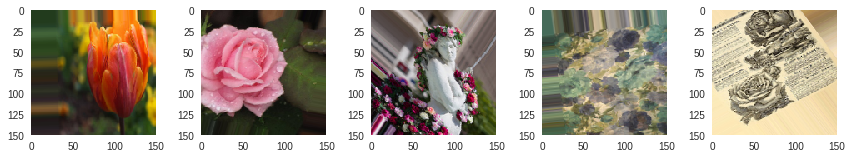

In [11]:
plotImages(sample_training_images[:5])

## Build and Train the model

In [0]:
EPOCHS = 20

In [0]:
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dense(5, activation='softmax'))

conv_base.trainable = False

model.compile(loss= 'categorical_crossentropy',
              optimizer='sgd',
              metrics=['acc'])


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(1000.0 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(500.0 / float(BATCH_SIZE)))
)

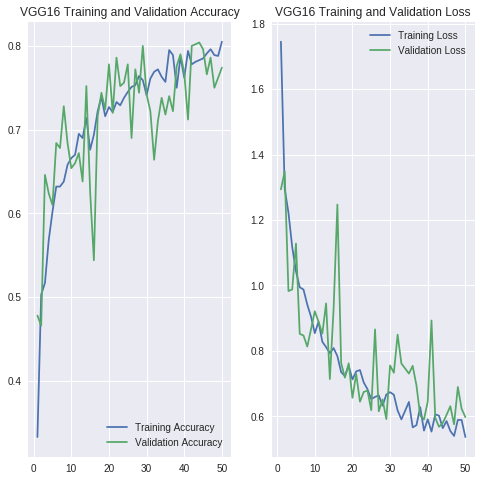

In [14]:
 plt_acc(history, pfx = 'VGG16')

In [0]:
#from tensorflow.keras.applications import ResNet50

conv_base = applications.ResNet50(weights='imagenet',include_top=False, input_shape=(150, 150, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

conv_base.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(1000.0 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(500.0 / float(BATCH_SIZE)))
)

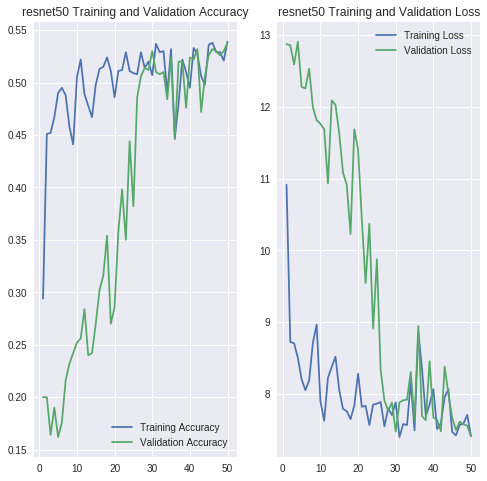

In [16]:
 plt_acc(history, pfx = 'resnet50')

In [28]:
conv_base = applications.InceptionV3(weights='imagenet',include_top=False, input_shape=(150, 150, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

conv_base.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(1000.0 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(500.0 / float(BATCH_SIZE)))
)

87916544/87910968 [==============================] - 3s 0us/step
Epoch 1/20
32/32 [==============================] - 16s 487ms/step - loss: 11.7779 - acc: 0.1960 - val_loss: 10.2617 - val_acc: 0.3160
Epoch 2/20
32/32 [==============================] - 12s 367ms/step - loss: 9.0438 - acc: 0.3360 - val_loss: 6.6596 - val_acc: 0.4880
Epoch 3/20
32/32 [==============================] - 12s 377ms/step - loss: 5.4249 - acc: 0.5280 - val_loss: 4.9110 - val_acc: 0.5780
Epoch 4/20
32/32 [==============================] - 12s 375ms/step - loss: 4.5519 - acc: 0.5370 - val_loss: 4.1101 - val_acc: 0.5400
Epoch 5/20
32/32 [==============================] - 12s 383ms/step - loss: 2.0222 - acc: 0.6380 - val_loss: 1.9656 - val_acc: 0.6880
Epoch 6/20
32/32 [==============================] - 12s 379ms/step - loss: 1.4167 - acc: 0.7120 - val_loss: 1.3592 - val_acc: 0.7120
Epoch 7/20
32/32 [==============================] - 12s 378ms/step - loss: 1.3968 - acc: 0.7110 - val_loss: 1.3235 - val_acc: 0.7160
Ep

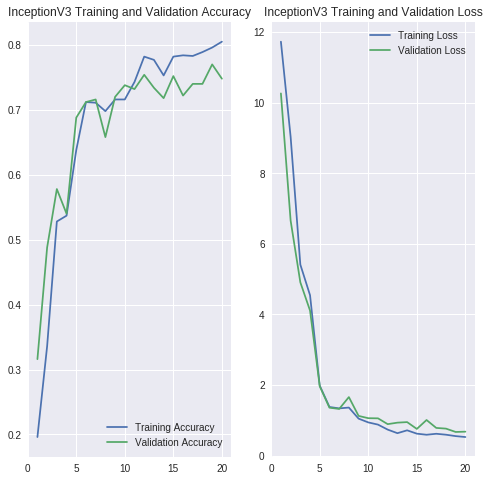

In [29]:
 plt_acc(history, pfx = 'InceptionV3')